In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("C:/Users/bhudi/Downloads/trainset.csv")

In [3]:
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [4]:
train=train_df.iloc[:,1:2].values

In [5]:
train

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(train)

In [8]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [9]:
x_train = []
y_train = []

In [10]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])

In [11]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [14]:
early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1, mode='min')

In [15]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 bidirectional (Bidirection  (None, 60, 200)           160800    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 60, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               120400    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                        

In [17]:
model.fit(x_train,y_train,epochs = 150, batch_size = 32, callbacks=[early_stopping],verbose=2)

Epoch 1/150
38/38 - 11s - loss: 0.0229 - 11s/epoch - 296ms/step
Epoch 2/150
38/38 - 3s - loss: 0.0028 - 3s/epoch - 85ms/step
Epoch 3/150
38/38 - 3s - loss: 0.0023 - 3s/epoch - 84ms/step
Epoch 4/150
38/38 - 3s - loss: 0.0025 - 3s/epoch - 90ms/step
Epoch 5/150
38/38 - 3s - loss: 0.0020 - 3s/epoch - 86ms/step
Epoch 6/150
38/38 - 3s - loss: 0.0019 - 3s/epoch - 90ms/step
Epoch 7/150
38/38 - 4s - loss: 0.0019 - 4s/epoch - 101ms/step
Epoch 8/150
38/38 - 3s - loss: 0.0019 - 3s/epoch - 87ms/step
Epoch 9/150
38/38 - 4s - loss: 0.0021 - 4s/epoch - 94ms/step
Epoch 10/150
38/38 - 4s - loss: 0.0022 - 4s/epoch - 95ms/step
Epoch 11/150
38/38 - 3s - loss: 0.0015 - 3s/epoch - 89ms/step
Epoch 12/150
38/38 - 3s - loss: 0.0020 - 3s/epoch - 88ms/step
Epoch 13/150
38/38 - 4s - loss: 0.0017 - 4s/epoch - 99ms/step
Epoch 14/150
38/38 - 4s - loss: 0.0015 - 4s/epoch - 99ms/step
Epoch 15/150
38/38 - 4s - loss: 0.0013 - 4s/epoch - 98ms/step
Epoch 16/150
38/38 - 4s - loss: 0.0014 - 4s/epoch - 100ms/step
Epoch 17/150

In [18]:
dataset_test =pd.read_csv("C:/Users/bhudi/Downloads/testset.csv")

In [19]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [21]:
dataset_total = pd.concat((train_df['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [22]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [23]:
inputs = inputs.reshape(-1,1)

In [24]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [25]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [26]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [27]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [28]:
pred = model.predict(x_test)

4/4 [==============================] - 2s 30ms/step


In [30]:
pred = sc.inverse_transform(pred)


In [31]:
pred

array([[1023.1278 ],
       [1022.17096],
       [1028.5076 ],
       [1043.2834 ],
       [1056.4019 ],
       [1066.4242 ],
       [1073.5969 ],
       [1071.8903 ],
       [1071.5466 ],
       [1069.9988 ],
       [1080.0739 ],
       [1086.739  ],
       [1091.836  ],
       [1094.5354 ],
       [1097.6049 ],
       [1107.8461 ],
       [1122.1617 ],
       [1129.6683 ],
       [1133.0658 ],
       [1134.2701 ],
       [1131.1443 ],
       [1129.3611 ],
       [1125.9967 ],
       [1109.0898 ],
       [1084.6666 ],
       [1045.5961 ],
       [1039.9352 ],
       [1037.0913 ],
       [1023.23016],
       [1024.116  ],
       [1027.5745 ],
       [1031.6726 ],
       [1044.932  ],
       [1057.7445 ],
       [1064.908  ],
       [1072.3494 ],
       [1079.2582 ],
       [1080.945  ],
       [1085.548  ],
       [1093.5598 ],
       [1092.1632 ],
       [1083.267  ],
       [1055.8922 ],
       [1043.58   ],
       [1050.2928 ],
       [1056.6406 ],
       [1070.7863 ],
       [1088.

In [33]:
import matplotlib.pyplot as plt

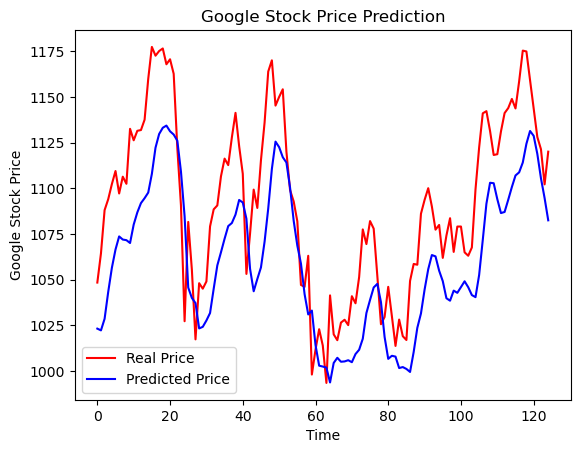

In [35]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(pred, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()